## Laboratory 3: Training a Shallow Neural Network with a Custom Dataset

### **Name:** SHIELA JANE TAHOYNON <br>
**Date:** October 08, 2023

### Import Libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, random_split
import torchvision
from torchvision import datasets, transforms
from sklearn.impute import SimpleImputer


import random
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

torch.backends.cudnn.deterministic=True
torch.set_printoptions(sci_mode=False)

import os
import time
from tqdm.notebook import tqdm

### Extract Transform Load: King County House Dataset

**About this file**.”

The dataset consists of house prices from King County an area in the US State of Washington, this data also covers Seattle. The dataset was obtained from Kaggle. This data was published/released under CC0: Public Domain. Unfortunately, the user has not indicated the source of the data. Please find the citation and database description in the Glossary and Bibliography.
The dataset consisted of 21 variables and 21613 obsions.ervat

- https://www.kaggle.com/datasets/shivachandel/kc-house-dataions.

In [2]:
df = pd.read_csv(r'C:\Users\User\Desktop\4th Yr. 1st Sem\Deep Learning (DS Elective4)\kc_house_data.csv')
desc = pd.read_csv("https://gist.githubusercontent.com/achillessin/416015f5dc51791c42d7db83d1f6b0b8/raw/c319d68eb2677351d3945af93ec1edffb52e3fb0/kchousing.csv")

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
desc

,column,description
0,id,a notation for a house
1,dateDate,house was sold
2,pricePrice,is prediction target
3,bedroomsNumber,of Bedrooms/House
4,bathroomsNumber,of bathrooms/bedrooms
5,sqft_livingsquare,footage of the home
6,sqft_lotsquare,footage of the lot
7,floorsTotal,floors (levels) in house
8,waterfrontHouse,which has a view to a waterfront
9,view,Has been viewed


### Exploratory Data Analysis

<i>1. Apply at least three EDA techniques to the provided dataset and evaluate the results.</i>

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

From this we can see that date is an object so we'll perform feature enginnering below to extract the month and year and store it in a separate columns so it can be useful in predicting the house prices.

### Perform Data Pre-processing
<i>2. Scale the features.</i>

<i>3. Drop `irrelevant` features for a regression machine learning tasks.</i>

>I'm expecting 19 `important` features including the target.

## FEATURE ENGINEERING

The sale date of the house could be a crucial predictor for the price. Despite being an object type, we can still leverage this feature. Instead of discarding it, we will transform it into separate columns in our dataframe for more effective use.

In [7]:
df['year'] = df['date'].apply(lambda x: x[0:4])
df['month'] = df['date'].apply(lambda x: x[4:6])

df = df.drop('date', axis=1)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,02
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,02


In [8]:
print(len(df['zipcode'].unique()),'\n')
print()

70 




Given that there are only 70 unique zip codes in our dataset, it can be feasible to perform one-hot encoding on the zipcode column, but it might make our traning of the model more complex. We don’t want our model to mistakenly interpret the numerical values of the zip codes as having an ordinal relationship, where higher or lower values could incorrectly influence the outcome. So as an alternative I take advantage of replacing the zipcode column with a lower-dimensional representation. I replace zipcode with two new columns: avg_price_by_zip and num_houses_by_zip. These columns could capture some of the information that the zipcode column provides without increasing the dimensionality of our data as much as one-hot encoding would.

In [9]:
# Calculate average price by zip code
avg_price_by_zip = df.groupby('zipcode')['price'].mean()
df['avg_price_by_zip'] = df['zipcode'].map(avg_price_by_zip)

# Calculate number of houses by zip code
num_houses_by_zip = df['zipcode'].value_counts()
df['num_houses_by_zip'] = df['zipcode'].map(num_houses_by_zip)

df = df.drop('zipcode', axis=1)

In [10]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,avg_price_by_zip,num_houses_by_zip
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,47.5112,-122.257,1340,5650,2014,10,310612.755725,262
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,47.7210,-122.319,1690,7639,2014,12,469455.770732,410
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,47.7379,-122.233,2720,8062,2015,02,462480.035336,283
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,47.5208,-122.393,1360,5000,2014,12,551688.673004,263
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,47.6168,-122.045,1800,7503,2015,02,685605.775510,441


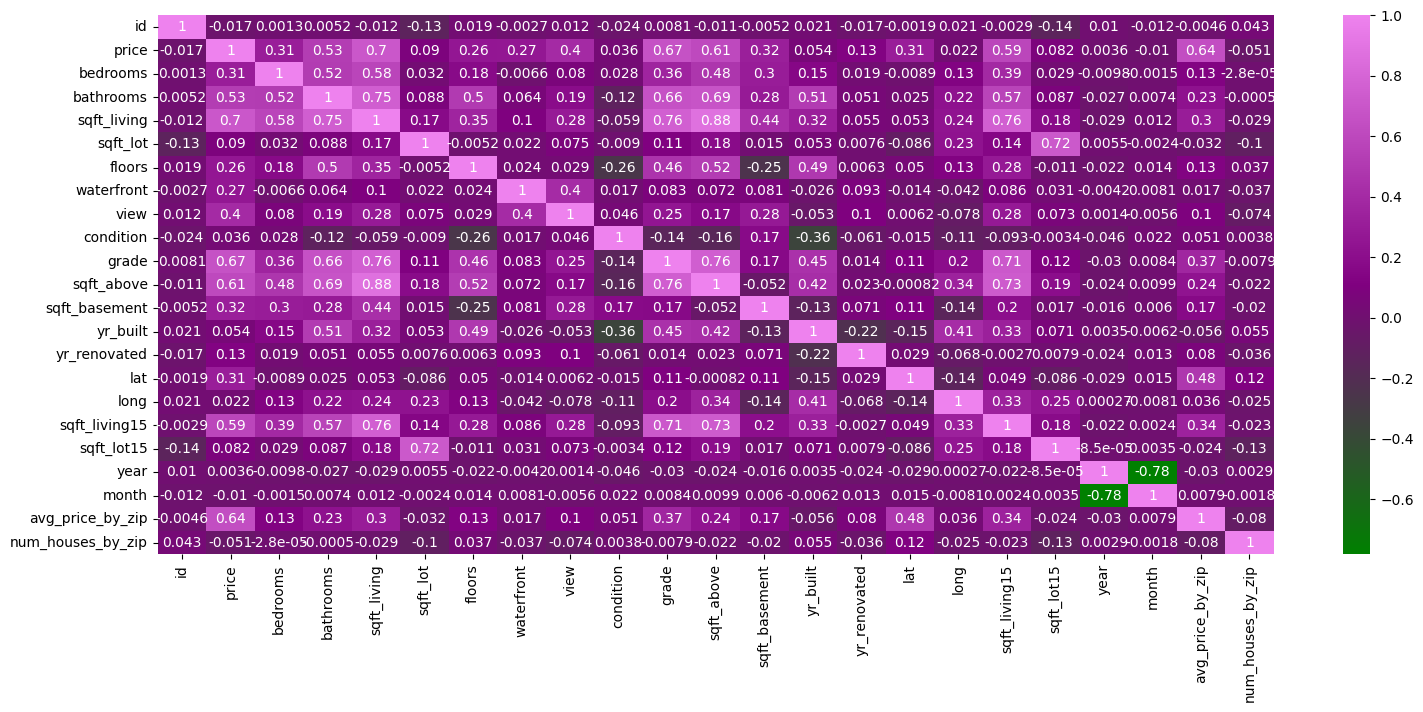

In [11]:
corr = df.corr()
colors = ["green","purple","violet"]
cmap = LinearSegmentedColormap.from_list("", colors)

plt.figure(figsize=(18, 7))
sns.heatmap(corr, cmap=cmap, annot=True)
plt.show()

The heatmap or correlation map indicates that the id and zipcode columns have the lowest correlation values with the target variable price, with correlation coefficients of -0.017 and -0.053, respectively. Which is true for id since its just a unique identifier of the houses in their data and does not affect our target which is the "price".

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))

df.drop('id', axis=1, inplace=True)
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,avg_price_by_zip,num_houses_by_zip
0,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,...,0.478261,0.000000,0.571498,0.217608,0.161934,0.005742,0.0,0.818182,0.039624,0.384058
1,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,...,0.443478,0.988089,0.908959,0.166113,0.222165,0.008027,0.0,1.000000,0.122083,0.652174
2,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,...,0.286957,0.000000,0.936143,0.237542,0.399415,0.008513,1.0,0.090909,0.118462,0.422101
3,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,...,0.565217,0.000000,0.586939,0.104651,0.165376,0.004996,0.0,1.000000,0.164772,0.385870
4,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,...,0.756522,0.000000,0.741354,0.393688,0.241094,0.007871,1.0,0.090909,0.234292,0.708333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.037377,0.090909,0.31250,0.093585,0.000370,0.8,0.0,0.0,0.5,0.583333,...,0.947826,0.000000,0.874055,0.143688,0.194631,0.000986,0.0,0.363636,0.182023,1.000000
21609,0.042623,0.121212,0.31250,0.152453,0.003206,0.4,0.0,0.0,0.5,0.583333,...,0.991304,0.000000,0.570693,0.130399,0.246257,0.007523,1.0,0.090909,0.064994,0.431159
21610,0.042898,0.060606,0.09375,0.055094,0.000503,0.4,0.0,0.0,0.5,0.500000,...,0.947826,0.000000,0.705324,0.182724,0.106866,0.001558,0.0,0.454545,0.187021,0.530797
21611,0.042623,0.090909,0.31250,0.098868,0.001132,0.4,0.0,0.0,0.5,0.583333,...,0.904348,0.000000,0.608975,0.373754,0.173980,0.000731,1.0,0.000000,0.198672,0.655797


Also I notice that there's a big range of values in the yr_renovated column that might impact our training and testing in our model so let's check the percentage of unique years it was renovated.

In [13]:
(df.yr_renovated.value_counts(normalize = True)* 100).head()

yr_renovated
0.000000    95.771064
0.999504     0.421043
0.999007     0.171193
0.994045     0.166566
0.995037     0.161940
Name: proportion, dtype: float64

Approximately 95.77% of the houses in our dataset have not been renovated (yr_renovated is 0). <br>
2014     0.421277: Approximately 0.42% of the houses in the dataset were renovated in 2014.<br>
2013     0.171288: Approximately 0.17% of the houses in the dataset were renovated in 2013.<br>
2003     0.166659: Approximately 0.17% of the houses in the dataset were renovated in 2003.<br>
2005     0.162030: Approximately 0.16% of the houses in the dataset were renovated in 2005.

correlation between yr_renovated and price is 0.12643379344089264


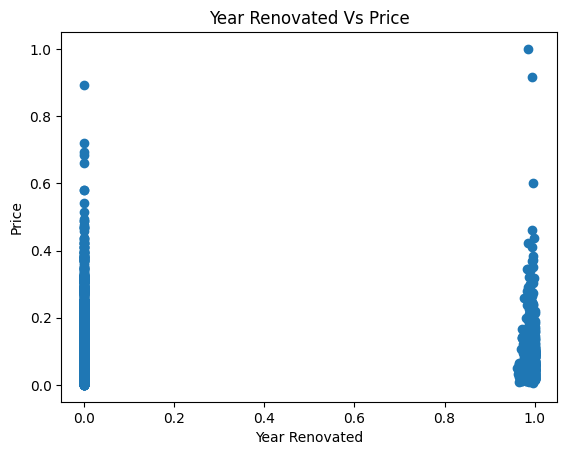

In [14]:
print("correlation between yr_renovated and price is {}".format(df['yr_renovated'].corr(df['price'])))
plt.scatter(x = df.yr_renovated ,y = df.price)
plt.title("Year Renovated Vs Price")
plt.xlabel("Year Renovated")
plt.ylabel("Price")
plt.show()

From the plot Year renovated vs price, it shows yr_renovated doesn’t significantly impact house price, including this feature could introduce noise into our model, potentially decreasing its performance. So, let's just drop it.

In [15]:
df.drop("yr_renovated",axis = 1 , inplace =True)


## Correlation Heatmap

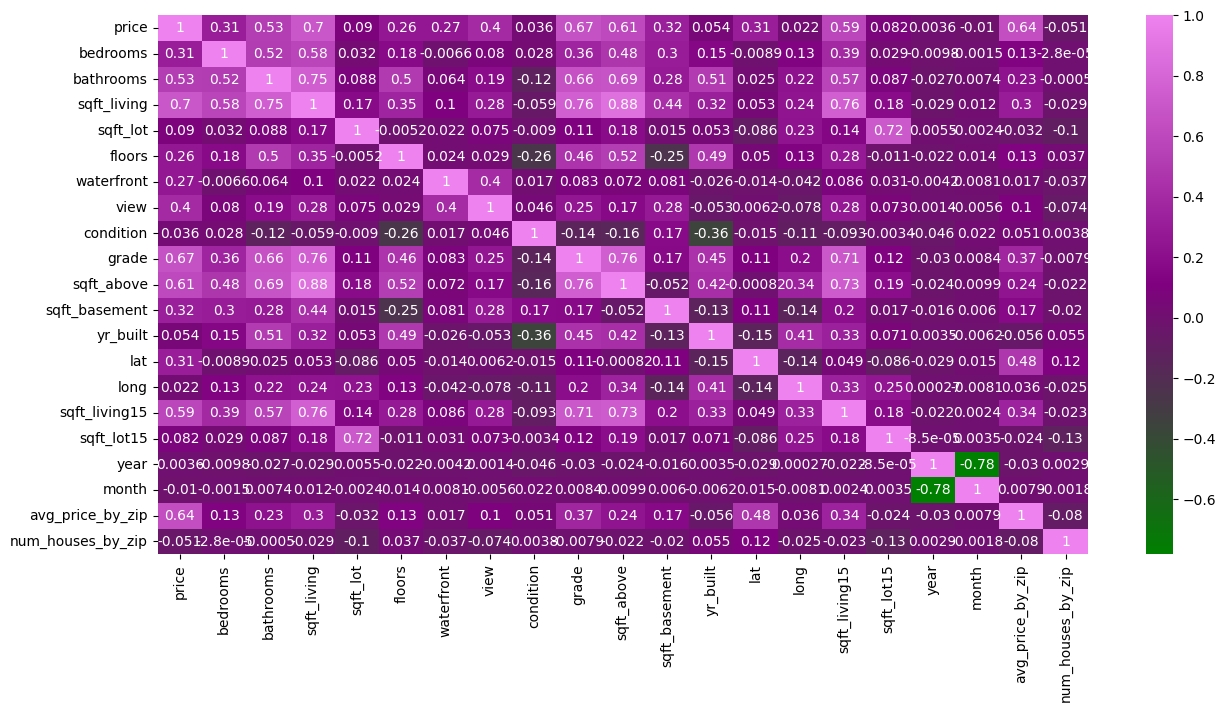

In [16]:
corr = df.corr()
colors = ["green","purple","violet"]
cmap = LinearSegmentedColormap.from_list("", colors)

plt.figure(figsize=(15, 7))
sns.heatmap(corr, cmap=cmap, annot=True)
plt.show()

Through the correlation heatmap, we can examine the correlation coefficients among our features. If any feature exhibits a strong negative correlation with our target variable, it might be worth considering its removal. Based on our analysis, the current results show improved correlations compared to the previous heatmap.

### Define Utility Class and Function

- custom dataset class
- set seed function
- count parameter function

In [17]:
def set_seed(seed=42):
    np.random.seed(seed)
    torch.manual_seed(seed)
    random.seed(seed)
    
class HouseDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        x = self.df.iloc[idx, self.df.columns != 'price'].values.astype('float32').reshape((20,1))
        y = self.df.iloc[idx, self.df.columns == 'price'].values.astype('float32').reshape((1,1))

        if self.transform:
            x = self.transform(x)
            y = self.transform(y)

        return (x, y)

def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')

### Instantiate Dataset Object for PyTorch Training

<i>4. Create an instance of the `Dataset` class, use `transforms.ToTensor()` for the `transform` parameter and, from that instance, create the `train_set`, `val_set`, and `test_set` using the `torch.utils.data.random_split` function. Use these partitioning parameters consecutively (0.7, 0.2, 0.1).</i>

In [18]:
# Convert data to PyTorch tensors
transform = transforms.ToTensor()

# Create an instance of the Dataset class
dataset = HouseDataset(df, transform=transform)

train_set, val_set, test_set = torch.utils.data.random_split(dataset, [0.7, 0.2, 0.1])

### Transform Datasets to Dataloaders

<i>5. Set the seed to its default parameter `42`, set the `batch_size` to 32, and convert the datasets that you created in item 4 into dataloaders.</i>

In [19]:
# Saet the seed
set_seed(42)

# Set the batch size
batch_size = 32

# Convert the datasets into DataLoaders
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)



In [20]:
for x_, y_ in train_loader:
    break

print(f"X shape: {x_.shape}")
print(f"Y shape: {y_.shape}")

X shape: torch.Size([32, 1, 20, 1])
Y shape: torch.Size([32, 1, 1, 1])


<i>6. Do all batches in a dataloader contained the same number of instances? Provide an example.</i>

> Answer: Nope, total number of instances might not be exactly divisible by the batch size. For example, if we have 100 instances and a batch size of 32, we would have three batches of 32 instances and one final batch of 4 instances.

<i>7. How many batches must be processed to complete a full epoch?</i>

In [21]:
print(f'train loader: {len(train_set)//batch_size} \nval_loader: {len(val_set)//batch_size} \ntest_loader: {len(train_set)//batch_size}')

train loader: 472 
val_loader: 135 
test_loader: 472


The number of batches needed to complete a full epoch is equal to the total number of instances divided by the batch size (rounded up if not exactly divisible) according to PyTorch documentation retrived from https://pytorch.org/docs/stable/data.html. 

In this case:

For the training set: 472 batches
For the validation set: 135 batches
For the test set: 472 batches

These are the numbers of batches that must be processed to complete a full epoch for each respective dataset.

### Define Architecture Class

Follow the shallow neural network architectrue below for defining the class.
<center><img src="https://github.com/JhunBrian/DS-413/blob/main/02%20Application%20of%20Deep%20Learning/Convolutional%20Neural%20Networks/figures/lab3_arch.png?raw=true" width="200"></center>

*Note that bias is True for each hidden layer node.*

<i>8. What will happen if we don't apply activation function to each hidden nodes? Will it still work?</i>

> Answer: If we don’t apply an activation function to the hidden nodes in a neural network, the network will still work, but it will only be able to model linear relationships. This is because without an activation function, each layer in the network is just performing a linear transformation on its inputs, so there's no point of performing deep learning in that case.

<i>9. Complete the architecture below, uncomment the statements after you supplied the correct parameters.</i>

In [22]:
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fcn1 = nn.Linear(20, 64) # input, output
        self.fcn2 = nn.Linear(64, 1) # input, output

    def forward(self, x):
        x = x.view(-1, 20) # number of features
        x = F.relu(self.fcn1(x))
        x = self.fcn2(x)
        return x

<i>10. How is the number the trainable parameters being calculated?</i>

> Answer: From my arcitecture above, <br>
For fcn1, which is a linear layer with 20 inputs and 64 outputs, there are 20*64 weights and 64 biases, totaling 20*64 + 64 = 1344 parameters.<br>
For fcn2, which is a linear layer with 64 inputs and 1 output, there are 64*1 weights and 1 bias, totaling 64*1 + 1 = 65 parameters.<br>

The total number of trainable parameters in this network is 1344 + 65 = 1409

### The TrainingLoop Class
*Use this class to train your model. You may not use or enable 'cuda' this time, because I only tested the code to a cpu device and I am not certain if it will behave similarly with gpu :v*

In [23]:
class TrainingLoop:
    def __init__(self, optimizer, criterion, model):
        self.optimizer = optimizer
        self.criterion = criterion
        self.model = model
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.metrics_fn = metrics

    def fit_loader(self, dataloader, for_train=True):
        
        mode = 'Training' if for_train else 'Evaluation'
        desc = f'{mode} Mode' 
        self.model.train() if for_train else self.model.eval()
        
        preds, trues = [], []
        for b, (x_data, y_data) in enumerate(dataloader):
            b += 1
            
            x_shape = x_data.shape[0], x_data.shape[-2]
            y_shape = y_data.shape[0], y_data.shape[-2]
            
            x_data = x_data.to(self.device)
            y_data = y_data.to(self.device)
            y_data = y_data.view(y_shape)
            
            pred = self.model(x_data)
            loss = self.criterion(pred, y_data)

            if for_train:
                # Backward pass and optimization (only during training)
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()
                
            preds.append(pred)
            trues.append(y_data)
        
        preds = torch.cat(preds, dim=0).detach().numpy()
        trues = torch.cat(trues, dim=0).detach().numpy()
        preds_x_trues = {'preds':preds, 'trues':trues}
        
        return loss, self.model, preds_x_trues

    def train(self, train_loader, val_loader, num_epochs):
        scores = {
            'train_mse':[],
            'val_mse':[],
            'val_r2':[],
            'val_mae':[]
        }
        
        print("{:^15} {:^15} {:^15} {:^15} {:^15}".format("epoch", "train_loss", "val_loss", "val_r2", "val_mae"))
        for epoch in range(num_epochs):
            
            train_loss, _, _ = self.fit_loader(train_loader, for_train=True)
            scores['train_mse'].append(train_loss.item())

            with torch.no_grad():
                val_loss, trained_model, preds_x_trues = self.fit_loader(val_loader, for_train=False)
                scores['val_mse'].append(val_loss.item())
                
            r2 = self.metrics_fn.r2_score(preds_x_trues['trues'], preds_x_trues['preds'])
            mae = self.metrics_fn.mean_absolute_error(preds_x_trues['trues'], preds_x_trues['preds']).astype('float32')
            scores['val_r2'].append(r2)
            scores['val_mae'].append(mae)
            
            print(f"{epoch+1:^15} {train_loss.item():^15.5f} {val_loss.item():^15.5f} {r2:^15.5f} {mae:^15.5f}")
            
        return scores, trained_model

<i>11. Instantiate a `TrainingLoop` object and provide necessary parameters.</i>


optimizer = `torch.optim.SGD(model.parameters(), lr=0.001)`\
criterion =  `nn.MSELoss()`\
model = `Regressor()`

epochs = `30`


Example Implementation:
```python
trainer = TrainingLoop(optimizer, criterion, model)

# this is for training and validation, the method returns the history or scores for each epoch and the model that was used for validation.
history, trained_model = trainer.train(train_loader, val_loader, num_epochs=30)

# this is for testing, make sure to set `for_train=False` to disable gradient calculations and set the model to eval mode.
# this method returns a scalar test_loss, the model used for testing, and a dictionary of predicted and true values.
test_loss, trained_model, pred_results = trainer.fit_loader(test_loader, for_train=False)
```

In [24]:
model = Regressor()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

epochs = 30

trainer = TrainingLoop(optimizer, criterion, model)
history, trained_model = trainer.train(train_loader, val_loader, num_epochs=30)

     epoch        train_loss       val_loss         val_r2          val_mae    


       1            0.00141         0.00146        -0.10185         0.03359    
       2            0.00146         0.00305        -0.00889         0.03248    
       3            0.00091         0.00655         0.04445         0.03160    
       4            0.00117         0.00256         0.08882         0.03053    
       5            0.00210         0.00092         0.12694         0.02970    
       6            0.00047         0.00004         0.16025         0.02899    
       7            0.00060         0.00061         0.18976         0.02840    
       8            0.00073         0.00310         0.21617         0.02775    
       9            0.00096         0.00082         0.24015         0.02720    
      10            0.00064         0.00015         0.26200         0.02665    
      11            0.00095         0.00140         0.28230         0.02621    
      12            0.00156         0.03167         0.30106         0.02575    
      13            0.00050         0.00

<i>12. Feed the TestLoader to the trained model.</i>

*Use the `fit_loader` method.*

In [25]:
test_loss, trained_model, pred_results = trainer.fit_loader(test_loader, for_train=False)

<i>13. Create a line plot of the first 100 values for both the predicted and the true values, use correct axis labels and title, and assess the visualization.</i>

> Answer: 

Text(0.5, 1.0, 'predicted values vs true values')

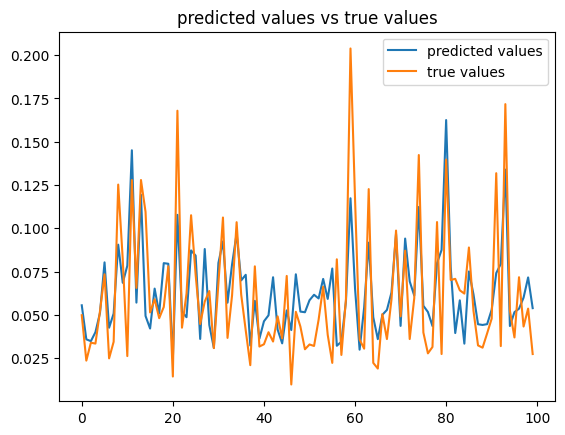

In [26]:
plt.plot(pred_results['preds'][:100], label="predicted values")
plt.plot(pred_results['trues'][:100], label="true values")
plt.legend()
plt.title("predicted values vs true values")

In [29]:
print("Predicted values:", pred_results['preds'][:100])
print("True values:", pred_results['trues'][:100])

Predicted values: [[0.05554927]
 [0.03590395]
 [0.03484479]
 [0.04002325]
 [0.05113377]
 [0.08033019]
 [0.0425893 ]
 [0.05079643]
 [0.0905479 ]
 [0.06851892]
 [0.07841578]
 [0.14503486]
 [0.05709353]
 [0.11931395]
 [0.04938891]
 [0.0421317 ]
 [0.06517614]
 [0.05088919]
 [0.07987832]
 [0.07952359]
 [0.02475996]
 [0.10776482]
 [0.05170173]
 [0.04866956]
 [0.0872252 ]
 [0.08421851]
 [0.03611701]
 [0.08803874]
 [0.04417386]
 [0.03095802]
 [0.07996219]
 [0.09246215]
 [0.05704743]
 [0.0791878 ]
 [0.09700701]
 [0.06992456]
 [0.0731549 ]
 [0.03228887]
 [0.05811972]
 [0.03626805]
 [0.04631393]
 [0.04976352]
 [0.07173854]
 [0.04155126]
 [0.03356746]
 [0.05261225]
 [0.04125373]
 [0.07344629]
 [0.05190871]
 [0.05153868]
 [0.05846976]
 [0.06162404]
 [0.05949466]
 [0.0707719 ]
 [0.05922044]
 [0.07677564]
 [0.03218105]
 [0.03453858]
 [0.05777382]
 [0.1173259 ]
 [0.06520452]
 [0.02992733]
 [0.05433203]
 [0.0917093 ]
 [0.04861434]
 [0.03600037]
 [0.05005762]
 [0.05288083]
 [0.06295435]
 [0.09681929]
 [

Looking at the predicted and true values, it seems that the model is doing a reasonable job of predicting the target variable. The predicted values appear to be in the same range as the true values.

<i>14. Plot the true values against the predicted values in a scatterplot, and make an assessment.</i>

> Answer: 

Text(0.5, 1.0, 'Predicted values vs True values')

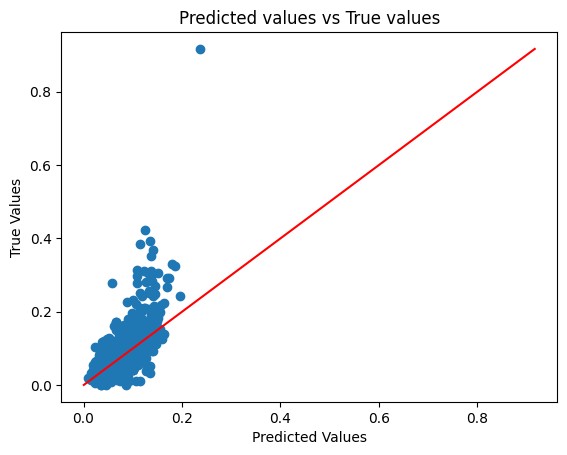

In [28]:
plt.scatter(pred_results['preds'], pred_results['trues'])
plt.xlabel("Predicted Values")
plt.ylabel("True Values")

plt.plot([min(pred_results['trues']), max(pred_results['trues'])], [min(pred_results['trues']), max(pred_results['trues'])], color='red')

plt.title("Predicted values vs True values")

Upon closer examination, it appears that the spread of points is predominantly situated above the diagonal line on the y-axis. This pattern suggests that the model frequently underestimates the true values, meaning the predicted values are often lower than the actual values. This could be indicative of a systematic bias in the model, where it consistently predicts lower values than it should. Such a pattern is a signal that there may be room for improvement in the model. 

Read more about this at Stack Exchange. (2015, May 19). Overestimated and underestimated predictions in regression. https://stats.stackexchange.com/questions/180010/overestimated-and-underestimated-predictions-in-regression

<i>15. Write down your assumptions about how you ended up with these results and what we should do to somehow improve them.</i>


Model Performance: The model seems to have a bias towards underestimating the house prices. This could be due to various factors such as the model's inability to capture certain patterns in the data, or certain features being underrepresented or not included in the model. This underscores the need for further investigation and refinement of the model.<br>

Feature Importance: The engineered features 'avg_price_by_zip' and 'num_houses_by_zip' seem to be informative for the model. However, it might be beneficial to consider other features or interactions between features that could better capture the patterns in the house prices.<br>

Model Improvement: The observed bias in the model predictions suggests that there's room for improvement. Possible strategies could include exploring more complex models, improving feature engineering, incorporating more features, and tuning the model parameters.<br>

### Insights & Takeaways on Predicting King County House Prices:

Location: The 'zipcode' feature seems to be a significant predictor of house prices, indicating that location plays a crucial role in determining house prices.<br>

House Features: Certain features of the house, such as the number of bedrooms, bathrooms, and the square footage, are likely to be important predictors of the house price.<br>

Seasonality: The 'month' feature derived from the 'date' feature might capture any seasonal trends in house prices, such as higher prices during certain months due to increased demand.<br>

Neighborhood: The features 'avg_price_by_zip' and 'num_houses_by_zip' capture some aspects of the neighborhood where the house is located.<br>

In conclusion, while the model is doing a decent job in predicting house prices, there is a noticeable bias in the predictions. Therefore, further refinement and enhancement of the model are needed to improve its performance and make it more reliable